# Analyzing Vehicle Dataset using Data Science 

This notebook focuses on using many python based machine learning libraries to analyze vehicle dataset 

We're going to take the following approach

0. Importing Required Packages
1. Data Loading And Preparation 
2. Data Cleaning And Pre-processing 
3. Exploratory Data Analysis
4. Feature Engineering
5. Insights And Recommondation 

## 0. Importing Required Packages

In [1]:
# For data handling and manipulations
import pandas as pd
import numpy as np

# For data visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split

# Handling Missing Values
from sklearn.impute import SimpleImputer

%matplotlib inline

## 1. Data Loading And Preparation 

In [2]:
# loading the given dataset
df = pd.read_csv('vehicles.csv')

# Taking a look at top 10 rows
df.head(10)

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,...,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,it_220403501,1709340920,19.069258,78.355225,NaN,NaN,35,NaN,NaN,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,it_220403501,1709340983,19.069094,78.355339,NaN,NaN,0,NaN,NaN,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,it_220403501,1709341725,19.069117,78.356079,NaN,NaN,22,NaN,NaN,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,it_220403501,1709344633,19.069157,78.356049,NaN,NaN,0,NaN,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,it_220403501,1709344696,19.069153,78.356049,NaN,NaN,0,NaN,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,it_220403501,1709344759,19.069094,78.356041,NaN,NaN,0,NaN,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,it_220403501,1709344822,19.069141,78.355995,NaN,NaN,0,NaN,NaN,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Taking a look at bottom 10 rows
df.tail(10)

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,...,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
18424,it_220403501,1713635546,18.880184,79.027122,NaN,NaN,0,NaN,NaN,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18425,it_220403501,1713635610,18.877752,79.026230,NaN,NaN,0,NaN,NaN,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18426,it_220403501,1713635673,18.875942,79.025505,NaN,NaN,29,NaN,NaN,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18427,it_220403501,1713635736,18.874006,79.024727,NaN,NaN,75,NaN,NaN,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18428,it_220403501,1713635800,18.871817,79.022720,NaN,NaN,0,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18429,it_220403501,1713635865,18.869371,79.020393,NaN,NaN,50,NaN,NaN,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18430,it_220403501,1713635929,18.867130,79.018272,NaN,NaN,0,NaN,NaN,92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18431,it_220403501,1713635993,18.862076,79.013924,NaN,NaN,10,NaN,NaN,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18432,it_220403501,1713636056,18.859493,79.011673,NaN,NaN,52,NaN,NaN,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8
18433,it_220403501,1713636120,18.858324,79.009033,NaN,NaN,72,NaN,NaN,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.8


In [4]:
# Inspecting the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18434 entries, 0 to 18433
Columns: 141 entries, uniqueid to adblue_level
dtypes: float64(122), int64(13), object(6)
memory usage: 19.8+ MB


In [5]:
# Determining the size of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 18434 rows and 141 columns


In [6]:
# Identifying the types of variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [7]:
# Printing Numerical columns 
print(f"Numerical columns : {list(numerical_cols)}")

Numerical columns : ['ts', 'lat', 'lng', 'external_bat_voltage', 'internal_bat_voltage', 'engineload', 'tanklevel', 'throttle', 'coolant', 'intakeairtemp', 'engineoiltemp', 'imap', 'vehiclespeed', 'warmups', 'rpm', 'obddistance', 'maf', 'fuelrail', 'runtime', 'mil', 'obdstandards', 'telltale', 'pto_drive_engagement', 'engine_torque_percent', 'service_distance', 'gross_combination_vehicle_weight', 'selected_gear', 'current_gear', 'fuel_consumption', 'fuel_level', 'fl_level', 'fuel_rate', 'fuel_economy', 'accelerator_pedal_pos', 'vehicle_weight', 'air_suspension_pressure_front_axle_left', 'air_suspension_pressure_front_axle_right', 'air_suspension_pressure_rear_axle_left', 'air_suspension_pressure_rear_axle_right', 'state_of_charge', 'battery_pack_voltage', 'battery_pack_current', 'power', 'lamp_status', 'hydraulic_oil_filter', 'air_filter', 'no_charging', 'low_fuel', 'engine_temp_high', 'hydraulic_oil_temp_high', 'water_in_fuel', 'low_oil_pressure', 'roller_speed', 'vibration_status', '

In [8]:
# Printing Categorical Columns
print(f"Categorical columns : {list(categorical_cols)}")

Categorical columns : ['uniqueid', 'pluscode', 'can_raw_data', 'brake_switch_status', 'clutch_switch_status', 'parking_switch_status']


In [9]:
# Checking for missing values in the dataset
print(df.isnull().sum())

uniqueid                             0
ts                                   0
lat                                  0
lng                                  0
external_bat_voltage             18434
                                 ...  
boost_pressure                   18434
intake_manifold_1_temperature    18434
air_inlet_pressure               18434
exhaust_gas_temperature          18434
adblue_level                      3664
Length: 141, dtype: int64


## 3. Data Cleaning And Preprocessing


### Handling Missing Values

Now we will be handling missing values in the dataset, but we can see that there are certain columns which have all missing values, so before 
using imputer on columns having a few missing values we will identify and drop those columns which have all missing values. 

To do so, its not a good practice to alter the original dataset, so better we copy this dataset with another name and make changes in that and work
accordingly

In [10]:
# Copying dataset with another name
df_copy = df.copy()

In [11]:
df_copy.head()

,uniqueid,ts,lat,lng,external_bat_voltage,internal_bat_voltage,engineload,tanklevel,throttle,coolant,...,live_location,to_be_expired_at,status,event_id,particulated_trap_inlet_pressure,boost_pressure,intake_manifold_1_temperature,air_inlet_pressure,exhaust_gas_temperature,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,NaN,NaN,28,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,it_220403501,1709340794,19.069347,78.355141,NaN,NaN,22,NaN,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,it_220403501,1709340857,19.069414,78.355179,NaN,NaN,25,NaN,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,it_220403501,1709340920,19.069258,78.355225,NaN,NaN,35,NaN,NaN,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,it_220403501,1709340983,19.069094,78.355339,NaN,NaN,0,NaN,NaN,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Checking for columns with all null values and dropping it off the dataset
missing_cols = df_copy.columns[df_copy.isnull().all()]
df_copy = df_copy.drop(columns=missing_cols)

In [13]:
df_copy.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,100.0,102,215,0,1,102,Released,Released,Pressed,NaN
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,99.6,102,215,19,2,102,Released,Pressed,Pressed,NaN
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,99.6,102,215,0,1,102,Pressed,Pressed,Released,NaN
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,99.6,102,215,28,2,102,Released,Pressed,Released,NaN
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,100.0,102,215,1,2,102,Released,Pressed,Released,NaN


In [14]:
# Applying imputation for those numerical columns having missing values 
numerical_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
cols_with_missing = [col for col in numerical_cols if df_copy[col].isnull().any()]
imputer = SimpleImputer(strategy='mean')
df_copy[cols_with_missing] = imputer.fit_transform(df_copy[cols_with_missing])

In [15]:
# Verifying if the missing values has been imputed 
print(df_copy[cols_with_missing].isnull().sum())

runtime         0
fuel_level      0
adblue_level    0
dtype: int64


In [16]:
df_copy.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,100.0,102,215,0,1,102,Released,Released,Pressed,84.795315
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,99.6,102,215,19,2,102,Released,Pressed,Pressed,84.795315
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,99.6,102,215,0,1,102,Pressed,Pressed,Released,84.795315
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,99.6,102,215,28,2,102,Released,Pressed,Released,84.795315
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,100.0,102,215,1,2,102,Released,Pressed,Released,84.795315


it shows that we have handled all the missing numerical values

In [17]:
# Applying imputation for those categorical columns having missing values
categorical_cols = df_copy.select_dtypes(include=['object']).columns
categorical_cols_with_missing = [col for col in categorical_cols if df_copy[col].isnull().any()]

for col in categorical_cols_with_missing:
    if not df_copy[col].mode().empty:
        df_copy[col].fillna(df_copy[col].mode().iloc[0], inplace=True)

In [18]:
# Verifying if the the missing values has been imputed
print(df_copy[categorical_cols_with_missing].isnull().sum())

Series([], dtype: float64)


it shows that we have handled all the missing categorical values

In [19]:
df_copy.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,100.0,102,215,0,1,102,Released,Released,Pressed,84.795315
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,99.6,102,215,19,2,102,Released,Pressed,Pressed,84.795315
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,99.6,102,215,0,1,102,Pressed,Pressed,Released,84.795315
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,99.6,102,215,28,2,102,Released,Pressed,Released,84.795315
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,100.0,102,215,1,2,102,Released,Pressed,Released,84.795315


### Handling Duplicate Records

In [20]:
print("Duplicate Records : ")
print(df_copy.duplicated().sum())

Duplicate Records : 
0


So we got that dataset doesn't contains any duplicate records

In [21]:
# Taking a look at top 5 elements of dataset to be in track of provided data
df_copy.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,100.0,102,215,0,1,102,Released,Released,Pressed,84.795315
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,99.6,102,215,19,2,102,Released,Pressed,Pressed,84.795315
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,99.6,102,215,0,1,102,Pressed,Pressed,Released,84.795315
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,99.6,102,215,28,2,102,Released,Pressed,Released,84.795315
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,100.0,102,215,1,2,102,Released,Pressed,Released,84.795315


## 4. Exploratory Data Analysis

### Univariate Analysis

In [22]:
print("Univariate Analysis :")
df_copy.describe(include='all')

Univariate Analysis :


,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level
count,18434,1.843400e+04,18434.000000,18434.000000,18434.000000,18434.000000,1.843400e+04,18434.000000,18434.000000,1.843400e+04,...,18434.000000,18434.0,18434.0,18434.000000,18434.000000,18434.0,18434,18434,18434,18434.000000
unique,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN
top,it_220403501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Released,Pressed,Released,NaN
freq,18434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16752,15346,16807,NaN
mean,NaN,1.711641e+09,18.724254,78.865351,38.141206,84.571336,1.774969e+03,33.361762,937.044090,6.650076e+07,...,99.657546,102.0,215.0,28.044483,4.983780,102.0,NaN,NaN,NaN,84.795315
std,NaN,1.275937e+06,0.816184,3.208032,29.889358,7.718346,6.105149e-10,17.929579,327.003819,3.256334e+06,...,3.934917,0.0,0.0,28.824737,5.249083,0.0,NaN,NaN,NaN,13.937972
min,NaN,1.709341e+09,0.000000,0.000000,0.000000,30.000000,1.774969e+03,0.000000,0.000000,6.078080e+07,...,21.200000,102.0,215.0,0.000000,1.000000,102.0,NaN,NaN,NaN,44.400000
25%,NaN,1.710903e+09,18.701308,78.758909,10.000000,83.000000,1.774969e+03,22.359375,757.250000,6.373487e+07,...,100.000000,102.0,215.0,0.000000,1.000000,102.0,NaN,NaN,NaN,78.800000
50%,NaN,1.711692e+09,18.853032,79.092408,31.000000,85.000000,1.774969e+03,38.187500,950.812500,6.653239e+07,...,100.000000,102.0,215.0,23.000000,2.000000,102.0,NaN,NaN,NaN,84.795315
75%,NaN,1.712682e+09,18.921385,79.352821,64.000000,89.000000,1.774969e+03,47.011719,1157.500000,6.940603e+07,...,100.000000,102.0,215.0,56.000000,9.000000,102.0,NaN,NaN,NaN,99.200000


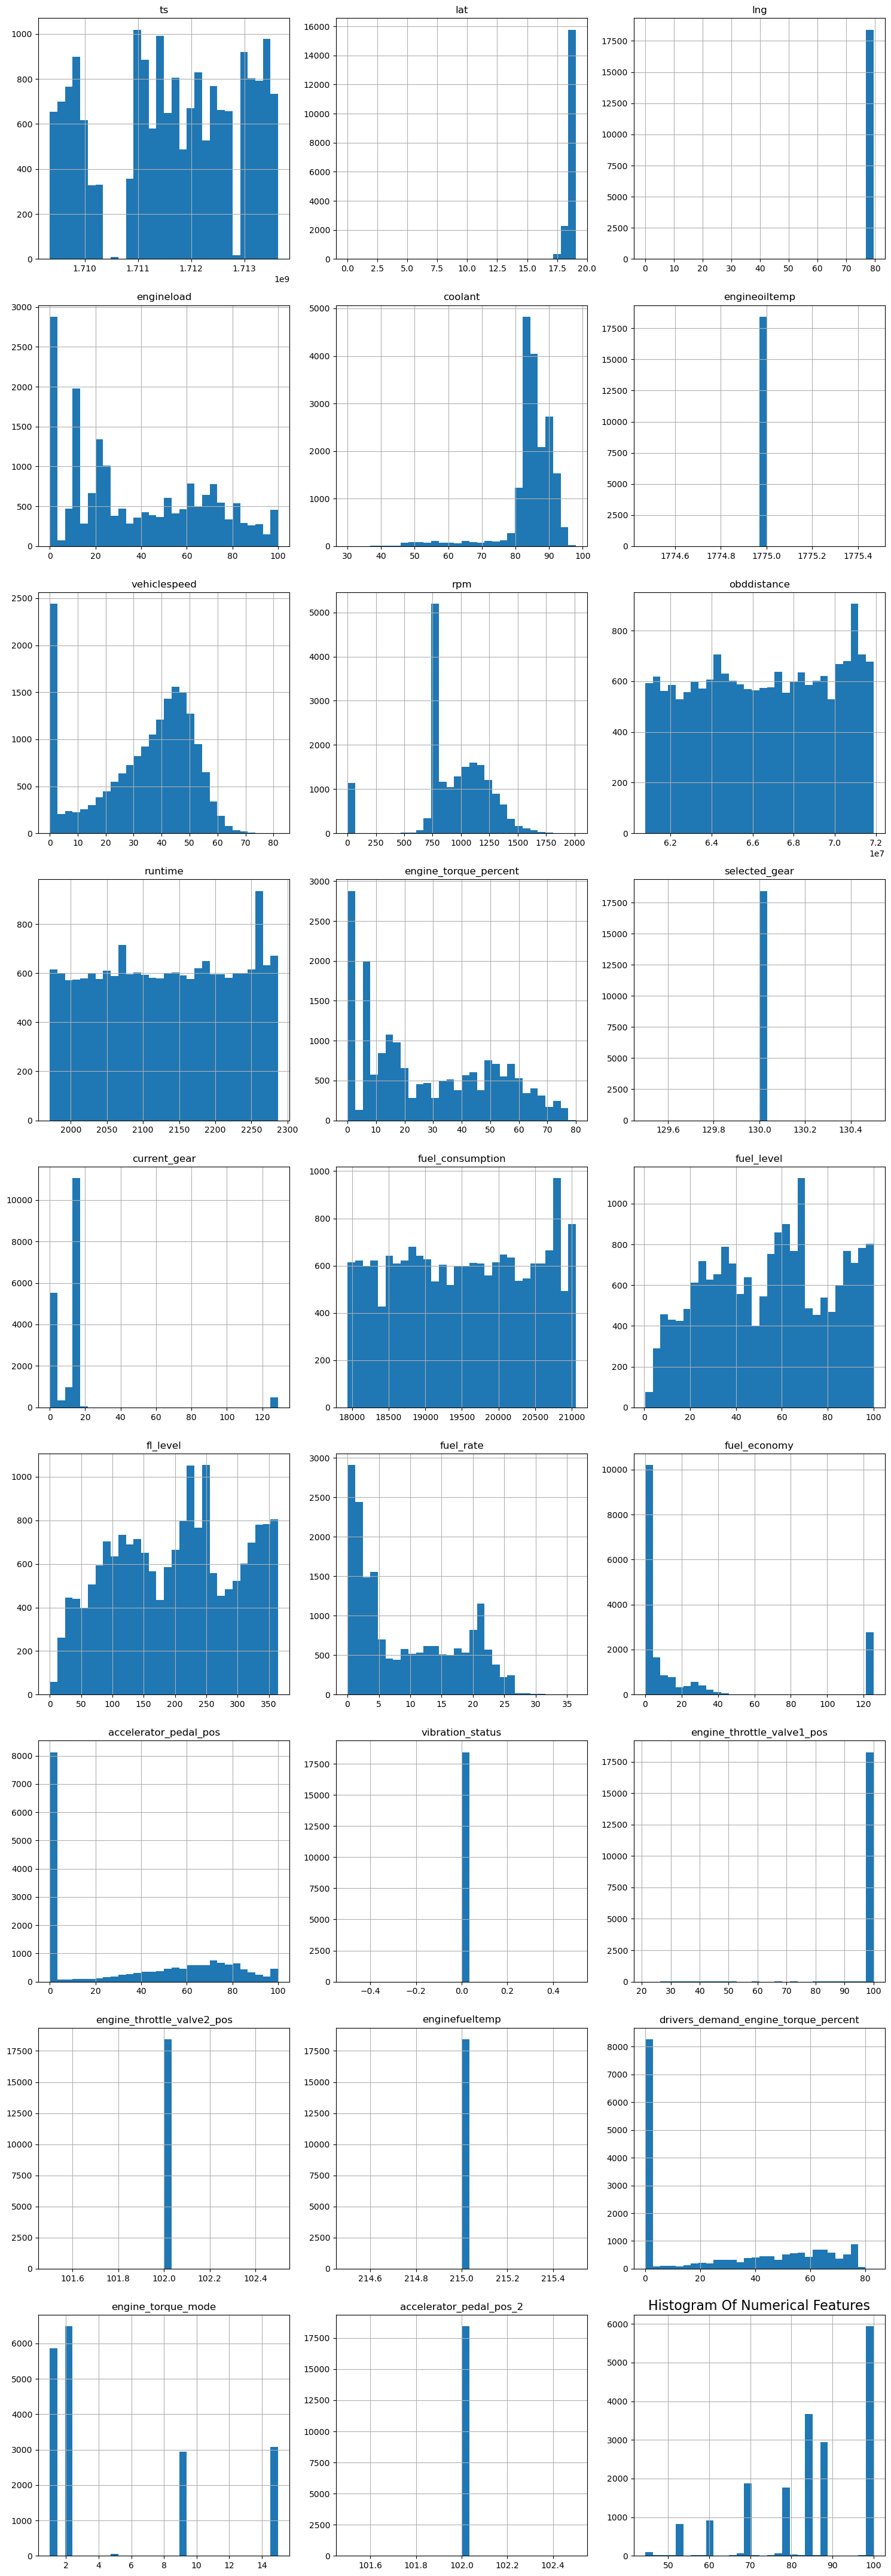

In [23]:
# Historgram for numerical features
numerical_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = len(numerical_cols)//n_cols + (len(numerical_cols) % n_cols > 0)

plt.figure(figsize=(15, n_rows*5))

for i, col in enumerate (numerical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    df_copy[col].hist(bins=30)
    plt.title(col)

plt.title("Histogram Of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

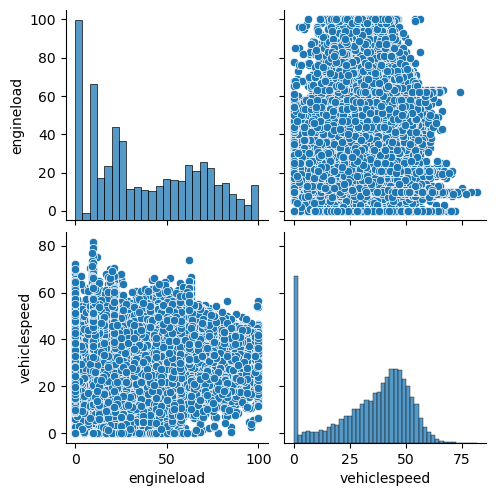

In [24]:
# Bivariate Analysis
sns.pairplot(df_copy, vars=['engineload', 'vehiclespeed'])
plt.show()

In [25]:
# Correlation Matrix
numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,runtime,...,fuel_economy,accelerator_pedal_pos,vibration_status,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,adblue_level
ts,1.000000,0.016310,0.000342,-0.063104,-0.026135,NaN,-0.099345,-0.061100,0.993215,0.992621,...,0.131413,-0.041097,NaN,0.043716,NaN,NaN,-0.030059,0.064722,NaN,-0.077022
lat,0.016310,1.000000,0.935495,-0.032206,-0.006842,NaN,-0.026450,-0.014414,0.013316,0.012474,...,-0.002174,-0.040771,NaN,-0.010638,NaN,NaN,-0.040616,-0.050951,NaN,0.049943
lng,0.000342,0.935495,1.000000,-0.021802,0.011704,NaN,-0.008306,-0.009798,0.006634,0.006539,...,-0.003275,-0.029712,NaN,-0.006687,NaN,NaN,-0.030611,-0.043994,NaN,-0.015808
engineload,-0.063104,-0.032206,-0.021802,1.000000,0.301353,NaN,0.180594,0.482889,-0.058534,-0.058783,...,-0.623559,0.902727,NaN,0.018063,NaN,NaN,0.897413,0.291625,NaN,-0.042850
coolant,-0.026135,-0.006842,0.011704,0.301353,1.000000,NaN,0.412702,0.435605,-0.025954,-0.027043,...,-0.211355,0.326964,NaN,0.006456,NaN,NaN,0.323835,-0.042404,NaN,-0.038939
engineoiltemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehiclespeed,-0.099345,-0.026450,-0.008306,0.180594,0.412702,NaN,1.000000,0.559204,-0.096542,-0.097150,...,-0.150622,0.236347,NaN,-0.053356,NaN,NaN,0.231210,-0.145131,NaN,-0.022158
rpm,-0.061100,-0.014414,-0.009798,0.482889,0.435605,NaN,0.559204,1.000000,-0.056769,-0.057713,...,-0.411809,0.560249,NaN,-0.097221,NaN,NaN,0.545234,-0.076857,NaN,-0.059659
obddistance,0.993215,0.013316,0.006634,-0.058534,-0.025954,NaN,-0.096542,-0.056769,1.000000,0.999557,...,0.125380,-0.039061,NaN,0.037389,NaN,NaN,-0.028897,0.061372,NaN,-0.122344
runtime,0.992621,0.012474,0.006539,-0.058783,-0.027043,NaN,-0.097150,-0.057713,0.999557,1.000000,...,0.126096,-0.039409,NaN,0.037588,NaN,NaN,-0.029270,0.061855,NaN,-0.122215


### Creating necessory crosstabs

In [26]:
# Compare coolant and engine oil temperature 
pd.crosstab(df.coolant, df.engineoiltemp)

engineoiltemp,1774.9688
coolant,
30,1
31,1
32,1
33,3
35,2
...,...
94,289
95,109
96,17


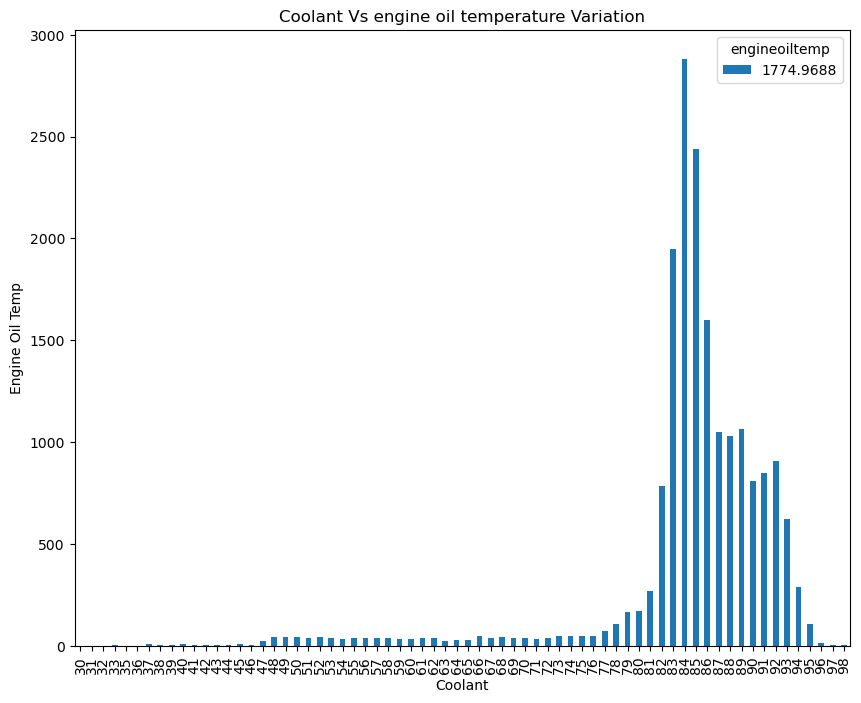

In [27]:
# Plotting the above crosstab
pd.crosstab(df.coolant, df.engineoiltemp).plot(kind = "bar", stacked = True, figsize = (10, 8))
plt.title("Coolant Vs engine oil temperature Variation")
plt.xlabel("Coolant")
plt.ylabel("Engine Oil Temp")
plt.show()

In [28]:
# Crosstab between Engine Load and Coolant 
pd.crosstab(df.engineload, df.coolant)

coolant,30,31,32,33,35,36,37,38,39,40,...,89,90,91,92,93,94,95,96,97,98
engineload,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,6,0,2,0,...,188,125,123,80,51,24,12,5,4,4
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,8,2,4,3,9,2,1,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,3,2,2,0,4,4,3,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,4,3,4,7,5,5,2,0,0,0


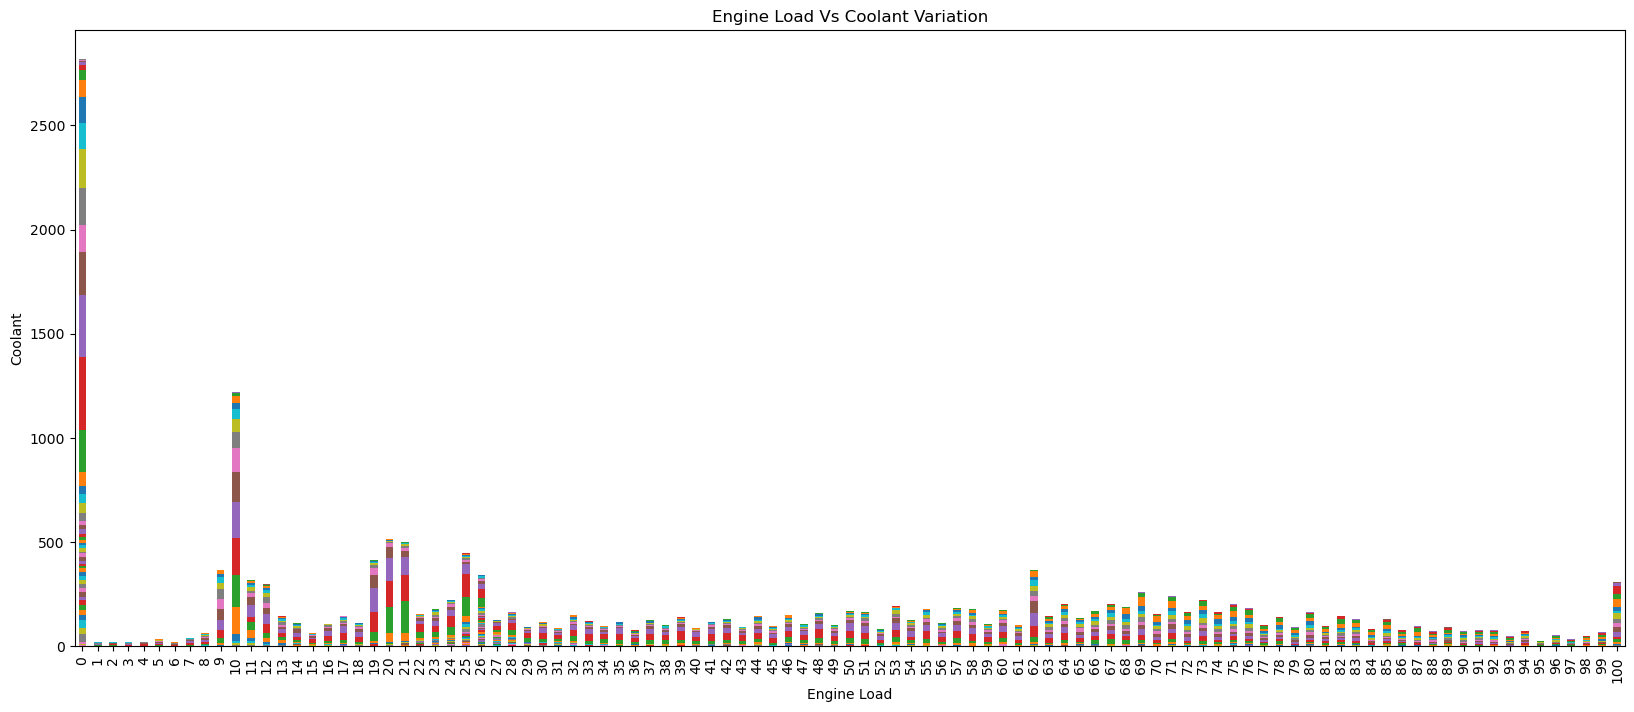

In [29]:
# Plotting Above Crosstab
pd.crosstab(df.engineload, df.coolant).plot(kind = "bar", stacked = True, figsize = (20, 8), legend = False)
plt.title("Engine Load Vs Coolant Variation")
plt.xlabel("Engine Load")
plt.ylabel("Coolant")
plt.show()

In [30]:
# Relation between RPM and vehicle speed
pd.crosstab(df.vehiclespeed, df.rpm)

rpm,0.000,49.000,51.375,93.000,101.250,113.250,114.000,124.000,129.625,201.625,...,1820.000,1822.125,1824.875,1832.000,1834.250,1878.250,1934.750,1975.250,1999.500,2011.250
vehiclespeed,,,,,,,,,,,,,,,,,,,,,
0.000000,1132,0,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,1,1
0.015625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.031250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.046875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.062500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75.015625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75.453125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76.968750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_short = df[:1000]

## 4. Feature Engineering

### Creating New Features

Now, in our dataset we have been given two columns, one is vehicle speed and another is Runtime, 
And we know that `v = s/t`
So we can find out how much max distance vehicle can cover with given parameters, using `s = v.t`
So we will create a new feature (column) for that

In [31]:
# Creating new feature 
df_copy['Max Distance'] = df_copy['vehiclespeed'] * df_copy['runtime']
df_copy.head()

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,Max Distance
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,102,215,0,1,102,Released,Released,Pressed,84.795315,0.000000
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,102,215,19,2,102,Released,Pressed,Pressed,84.795315,0.000000
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,102,215,0,1,102,Pressed,Pressed,Released,84.795315,2771.507812
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,102,215,28,2,102,Released,Pressed,Released,84.795315,5543.156250
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,102,215,1,2,102,Released,Pressed,Released,84.795315,8930.640625


so as said, we have created a new feature

In [32]:
# Standardizing Numerical Features
scaler = StandardScaler()
df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])

In [33]:
df_copy.head(20)

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status,adblue_level,Max Distance
0,it_220403501,-1.803203,0.422815,-0.159044,-0.339301,-6.681837,4.547474e-13,-1.860761,-0.575067,-1.756611,...,0.0,0.0,-0.972957,-0.758968,0.0,Released,Released,Pressed,0.0,0.000000
1,it_220403501,-1.803154,0.422824,-0.159046,-0.540047,-5.645318,4.547474e-13,-1.860761,0.829771,-1.756611,...,0.0,0.0,-0.313784,-0.568454,0.0,Released,Pressed,Pressed,0.0,0.000000
2,it_220403501,-1.803105,0.422906,-0.159034,-0.439674,-4.738363,4.547474e-13,-1.782327,-0.563981,-1.756611,...,0.0,0.0,-0.972957,-0.758968,0.0,Pressed,Pressed,Released,0.0,2771.507812
3,it_220403501,-1.803055,0.422715,-0.159020,-0.105097,-4.220103,4.547474e-13,-1.703893,0.181443,-1.756605,...,0.0,0.0,-0.001543,-0.568454,0.0,Released,Pressed,Released,0.0,5543.156250
4,it_220403501,-1.803006,0.422514,-0.158984,-1.276114,-3.572279,4.547474e-13,-1.608030,0.393602,-1.756599,...,0.0,0.0,-0.938264,-0.568454,0.0,Released,Pressed,Released,0.0,8930.640625
5,it_220403501,-1.802424,0.422542,-0.158753,-0.540047,-3.442714,4.547474e-13,-1.855532,-0.569715,-1.756574,...,0.0,0.0,-0.972957,-0.758968,0.0,Released,Pressed,Released,0.0,184.776563
6,it_220403501,-1.800145,0.422591,-0.158763,-1.276114,-4.090538,4.547474e-13,-1.860761,-2.865623,-1.756574,...,0.0,0.0,-0.972957,1.908236,0.0,Released,Released,Pressed,0.0,0.000000
7,it_220403501,-1.800096,0.422586,-0.158763,-1.276114,-4.090538,4.547474e-13,-1.860761,-2.865623,-1.756574,...,0.0,0.0,-0.972957,1.908236,0.0,Released,Pressed,Pressed,0.0,0.000000
8,it_220403501,-1.800046,0.422514,-0.158765,-1.276114,-4.090538,4.547474e-13,-1.860761,-2.865623,-1.756574,...,0.0,0.0,-0.972957,1.908236,0.0,Released,Released,Pressed,0.0,0.000000
9,it_220403501,-1.799997,0.422571,-0.158780,-1.276114,-4.220103,4.547474e-13,-1.860761,-2.865623,-1.756574,...,0.0,0.0,-0.972957,1.908236,0.0,Released,Released,Pressed,0.0,0.000000


## 5. Insights And Recommondations

### Insights : 

1. High engine load correlates with increased fuel consumption. As the engine works harder, it demands more fuel, leading to reduced fuel efficiency.
2. RPM and vehicle speed show a strong relationship. Higher RPM at higher speeds can lead to more engine strain and potentially greater wear over time.

### Recommendations : 

1. Maintain steady speeds to keep RPM and engine load low, which can improve fuel economy and reduce engine wear.
2. Monitor coolant and engine oil temperature regularly, especially during high engine load, to prevent overheating and ensure optimal engine performance.